***
# **M1MAO -- M1 MA 2020/2021 -- Université Paris-Saclay**
***

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import matplotlib.tri as tri

# TP2 :  Optimisation sous contraintes
##  Le problème d'obstacle

$$
\newcommand{\sca}[2]{\langle #1\mid #2 \rangle}
\newcommand{\nr}[1]{\left\|#1\right\|}
\newcommand{\LL}{\mathrm{L}} 
\newcommand{\Rsp}{\mathbb{R}}
\newcommand{\Psp}{\mathbb{P}}
\newcommand{\Class}{\mathcal{C}}
\newcommand{\id}{\mathrm{id}}
$$
Soit $\Omega$ un ouvert de $\Rsp^d$ (avec $d=1,2$) et $\Psi\in H^1_0(\Omega) \cap \Class^\infty(\Omega)$. On s'intéresse à la résolution du problème d'obstacle:
$$
\min_{v\in C} \int_\Omega \nr{\nabla v}^2
$$
où $C = \{ u\in H^1_0(\Omega) \mid u \geq \Psi\}$.
On discrétise ce problème par la méthode des éléments finis en dimension d. 
On part d'une triangulation $T_h$ de l'ouvert $\Omega$, et on note:
* $V_h$ l'espace des éléments finis $\Psp_1$ sur $T_h$, de sorte que $V_h\subseteq V := H^1(\Omega)$;
* $N_h :=\dim(V_h)$;
* $x_1,\dots,x_{N_h}$ les sommets de la triangulation et $\phi_1,\dots,\phi_{N_h}$ les fonctions chapeau correspondantes. On note $J_h$ l'ensemble des indices des sommets du bord.
* $V_{0h} = \{ v\in V_h\mid \forall k\in J_h, v(x_k) = 0 \}$
* $C_h = \{ v\in V_{0h}\mid \forall 1\leq i\leq N_h,~~ v(x_i) \geq \Psi(x_i) \}$

Le problème discret est alors donné par 
$$
\min_{v\in C_h} \int_\Omega \nr{\nabla v}^2.
$$

**Q0)** On note $W = (v_1,\dots,v_{N_h}) \in \Rsp^{N_h}$ les valeurs d'une fonction $v\in V_h$ sur les sommets $x_1,\dots,x_{N_h}$ (i.e. $v = \sum_{1\leq i\leq N_h} v_i \phi_i$ où $\phi_i$ est la base de $V_h$ formée des fonctions chapeau). Montrer que le problème peut être mis sous la forme

$$ \min_{W\in D_h} J(W):=\sca{W}{A W} $$
$$D_h = \{ W\in \Rsp^{N_h} \mid \forall 1\leq i\leq N_h, W_i \geq \Psi(x_i) \hbox{ et } \forall k\in J_h,~ W_k = 0\},$$

où $A_{ij} = \int_\Omega \sca{\nabla \phi_i}{\nabla \phi_j}$. Montrer que la matrice $A$ est symétrique et définie positive.





### Algorithme du gradient projeté 

$$ \newcommand{\id}{\mathrm{id}}
\newcommand{\D}{\mathrm{D}}
$$
L'objectif de cette premiere partie est d'introduire et de demontrer la convergence de l'algorithme du gradient projeté.

<div class="alert alert-block alert-danger">
<b>Algorithme du gradient projete</b>
Soit $J \in \Class^1(\Rsp^n)$ et $K\subseteq \Rsp^n$ un ensemble convexe fermé non vide. L'algorithme du gradient projeté à pas constat $\tau>0$ est donné par :

\begin{equation}  
\label{GP}
x^{(k+1)}=p_K(x^{(x)}-\tau\nabla J(x^{(k)})), 
\tag{GP}
\end{equation}
où $p_K(x)$ est la projection d'un point $x\in\Rsp^n$ sur $K$.

</div>

**Q1)** [**Constante de Lipschitz de $\id - \tau \nabla J$** ] On suppose  que $J\in \Class^2(\Rsp^n)$ et qu'il
    existe deux constantes $L\geq 0, \alpha>0$ telles que
    $$ \forall x,y\in \Rsp^n,\quad \nr{\nabla J(x) - \nabla J(y)} \leq L\nr{x - y} $$
    $$ \forall x,v\in \Rsp^n,\quad \sca{\D^2 J(x) v}{v} \geq \alpha
    \nr{v}^2, $$ la deuxième condition impliquant que $\D^2
    J\geq\alpha \mathrm{Id}_n$ au sens des matrices symétriques.
- (i) Démontrer que si $\tau \in (0,2\alpha/L^2)$, alors l'application $F_\tau: x\in \Rsp^n\mapsto x - \tau \nabla J(x)$ est contractante.   
- (ii) En déduire que pour tout $x^{(0)}\in\Rsp^n$, la suite définie par $x^{(k+1)} = F_\tau(x^{(k)})$ converge vers l'unique minimiseur de $J$ sur $\Rsp^n$

**Réponse:** 

(i)
\begin{align*}
\nr{F_\tau(x) - F_\tau(y)}^2
&= \nr{x - y}^2 - 2\tau \sca{x-y}{\nabla J(x) - \nabla J(y)} + \tau^2 \nr{\nabla J(x) -\nabla J( y)}^2  \\
&\leq (1 - 2\tau \alpha + \tau^2 L^2) \nr{x - y}^2
\end{align*}
et $1 - 2\tau \alpha + \tau^2 L^2 < 1$ si $L^2 \tau^2 < 2\tau \alpha$.
On doit juste montrer que $ \sca{x-y}{\nabla J(x) - \nabla J(y)}\geq \alpha\nr{x-y}^2$. 
Soit $x_t=x+t(y-x)$ et $v=y-x$ alors $$\nabla J(y)-\nabla J(x)=\int_0^1\D^2J(x_t)vdt.$$
On obtient que 
$$ \sca{y-x}{\nabla J(y) - \nabla J(x)}=\int_{0}^1\sca{\D^2J(x_t)v}{v}dt\geq\alpha\nr{v}^2. $$

(ii)
Comme $F_\tau$ est contractante elle admet un unique point fixe $x^*\in\Rsp^n$, $x^*=F_{\tau}(x^*)$, d'où on a
$\nabla J(x^\star)=0$. $x^*$ est alors l'unique minimiseur de $J$ ($J$ est convexe).

**Q2)** Dans cette question, on suppose que $J(x) = \frac{1}{2}\sca{x}{Ax}$, où $A$ est symétrique et définie positive de valeurs propres $0<\lambda_1\leq\cdots\leq\lambda_n$.
- (a) Montrer que si $\tau \in (0,2/\lambda_n)$ alors les valeurs propres de la matrice $\mathrm{Id}_n - \tau A$ sont dans $(-1,1)$.  
- (b) En déduire que pour tout $x^{(0)}\in\Rsp^n$, la suite définie par $x^{(k+1)} = x^{(k)} - \tau \nabla J(x^{(k)})$ converge vers l'unique minimiseur de $J$ sur $\Rsp^n$.

**Réponse:** 

 Soit $F_\tau(x)=(\mathrm{Id}_n - \tau A)x$ alors on a
$$ \nr{F_\tau(x)-F_\tau(y)}^2\leq\max_i|\lambda_i|\nr{x-y}^2, $$
où $\lambda_i$ sont les valeurs propres de la matrice $\mathrm{Id}_n - \tau A$.
Comme $\lambda_i\in(-1,1)$ on a que $F_\tau$ est contractante et il existe un unique point fixe $x^\star$ tel que 
$x^\star=F_\tau(x^*)$. On en déduit alors que $x^\star$ ets aussi l'unique minimiseur de $J$. 

Soit maintenant $J \in\Class^1(\Rsp^n)$ une fonction convexe et soit $K$ un convexe fermé de $\Rsp^n$. 

<div class="alert alert-block alert-danger">
<b>Projection sur un convexe</b>
  
On note $p=p_K(x)$ la projection d'un point $x\in \Rsp^n$ sur $K$, qui par théorème est l'unique point $p\in K$ vérifiant $\forall y\in K,\quad \sca{x - p}{p-y} \geq  0.$

</div>

**Q3)** Montrer que $x \in \arg\min_{K} J$ si et seulement si $\forall
    y \in K, \sca{-\nabla J(x)}{x-y} \geq 0$. 
    
**Réponse:** 
    
- ($\Longrightarrow$) Soit $v=y-x$ alors on a que $ \sca{\nabla J(x)}{v}=\lim_{t\to 0^+}\dfrac{J(x+tv)-J(x)}{t}\geq 0 $
- ($\Longleftarrow$) Comme $J$ convexe: $\forall y\in\Rsp^n$ $$J(y)\geq J(x)+\underbrace{\sca{-\nabla J(x)}{x-y}}_{\geq 0}\geq J(x),$$ d'où $x\in\arg\min_K J$.

**Q4)** Démontrer que l'application $p_K$ est $1$-lipschitzienne.

**Réponse:** 

On montre d'abord que $$ \sca{x-y}{p_K(x)-p_K(y)}\geq\nr{p_K(x)-p_K(y)}^2.$$
Par caractérisation de la projection  on que 
  $$\sca{x-p_K(x)}{p_K(x)-p_K(y)}\geq 0,$$
  et $$\sca{y-p_K(y)}{p_K(y)-p_K(x)}\geq 0.$$
 En sommant ces deux inégalités on a ce qu'on voulait montrer.
 Par Cauchy-Schwarz on a $$\nr{p_K(x)-p_K(y)}\leq \nr{x-y}.$$

**Q5)**  En utilisant la caractérisation précédente, démontrer
    l'équivalence entre:
    
- (i) $x$ minimise $J$ sur $K$  ;

- (ii) $\exists \tau>0$ tel que $p_K(x - \tau\nabla J(x)) = x$ ;

- (iii) $\forall \tau>0$ tel que $p_K(x - \tau\nabla J(x)) = x$ ;


**Réponse:** 

Soit $\tau>0$ alors en utilisant la caractérisation de la projection et l'inégalité d'Euler on a
$$ p_K(x-\tau \nabla J(x))=x \iff \forall y\in K\;\sca{x-\tau \nabla J(x)-x}{x-y}\geq 0 \iff \forall y\in K\;\sca{\nabla J(x)}{x-y}\geq 0.$$ 



**Q6)**  On se place sous les hypothèses de la question **Q1**. Montrer que pour tout $\tau \in (0,2\alpha/L^2),$
  et  tout $x^{(0)}\in \Rsp^n$, la suite $x^{(k+1)} := p_K(x^{(k)} - \tau\nabla J(x^{(K)}))$ converge vers le minimiseur de $J$ sur $K$, qui est unique.
  
**Q7)** On se place sous les hypothèses de la question **Q2**. Montrer que pour tout $\tau \in (0,2/\lambda_n),$ et tout $x^{(0)}\in \Rsp^n$, la suite $x^{(k+1)}:= p_K(x^{(k)} - \tau\nabla J(x^{(k)}))$ converge vers un point $x^*$ qui est l'unique minimiseur de $J$ sur $K$.

**Q8)**  Dans cette question , on suppose $K = \{V \in \Rsp^n \mid \forall i, V_i \geq \Psi_i\}$ où $\Psi\in\Rsp^n$ est donnée. Montrer que si $\bar{x} \in \arg\min_K J$ où $J\in\Class^1(\Rsp^n)$, alors $\lambda := -\nabla J(\bar x)$ vérifie
\begin{equation} 
\label{kkt} 
\begin{cases}
 \lambda_i = 0 &\hbox{ si } \bar{x}_i > \Psi_i \\ \lambda_i \leq 0
&\hbox{ sinon }
\end{cases}
\tag{kkt}
\end{equation}

**Réponse:** 

$\bar{x}\in K$, alors $\bar x + t e_i \in K$ pour tout $t>0$, de sorte que $J(\bar{x}+te_i)\geq J(\bar{x})$. On a alors
$$ \sca{\nabla J(\bar x)}{e_i}=\lim_{t\to0}\dfrac{J(\bar{x}+te_i)- J(\bar{x})}{t}\geq 0, $$
d'où $\lambda_i\leq 0$.
On sait que si $\bar x\in\arg\min_K J$ alors $\forall y\in \sca{\nabla J(\bar x)}{\bar x-y} \geq 0$.
Soit  $i_0$ t.q. $\bar x_{i_0}>\Psi_{i_0}$ et $y_i=\bar{x}_i$ $\forall i\neq i_0$ et $y_{i_0}=\Psi_{i_0}$, alors
$$ \sca{-\nabla J(\bar x)}{\bar x -y}=\underbrace{\lambda_{i_0}}_{\leq 0}\underbrace{(x_{i_{0}}-\Psi_{i_0})}_{> 0}\geq 0 $$
d'où $\lambda_{i_0}=0$.

**Q9)** Dans cette question, on suppose que $J\in\Class^1(\Rsp^n)$ est convexe. Démontrer que si $\bar{x}\in K$ et si $\lambda := -\nabla J(\bar x)\in \Rsp^n$ vérifie l'équation \eqref{kkt}, alors $\bar{x}$ minimise $J$ sur $K$.

**Réponse:** 

Comme $J$ est convexe on a $\forall y\in K$
\begin{align*} 
J(y)&\geq J(\bar x)+\sca{\nabla J(\bar x)}{y-\bar x}  \\
&= J(\bar x)+\sca{\nabla J(\bar x)}{y-\Psi}+\sca{\nabla J(\bar x)} {\Psi-\bar x}\\
&=J(\bar x)-\sca{\lambda}{y-\Psi}\underbrace{-\sca{\lambda} {\Psi-\bar x}}_{=0}\\
&=J(\bar x)-\underbrace{\sca{\lambda}{y-\Psi}}_{\leq 0}\geq J(\bar x).
\end{align*}
$\bar x$ est donc le minimiseur de $J$ sur $K$.

**Q10)** En déduire (on suppose $J$ convexe) que 
  $$\bar x \in\arg\min_K J\iff \exists \lambda\in\Rsp^n\;t.q.
  \begin{cases}
  &\bar x \in K,\\
  &-\nabla J(\bar x)=\lambda \\
  & \lambda_i =0\;\text{si}\;\bar x_i> \Psi_i\\
  & \lambda_i <0 \;\text{si}\;\bar x_i= \Psi_i\
\end{cases}$$

**Q11)** Démontrer que la projection de $x\in \Rsp^n$ sur $K$ est donnée par
    $$p_K(x) = (\max(x_1,\Psi_1),\cdots, \max(x_n,\Psi_n)).$$

**Q12)** Soit $W\in \Rsp^{N_h}$. Vérifier que la projection orthogonale de $W$ sur $D_h$ est donnée par

$$ \Pi_{D_h}(W) = \begin{cases} \max(W_i,\Psi(x_i)) & \hbox{ si } i\not\in J_h \\
0 & \hbox{ sinon } 
\end{cases}. $$
 Écrire une fonction `projDh(W,Psi)` retournant la projection de $W$ sur $D_h$ 


In [14]:
def projDh(W,Psi):
    return np.maximum(W, Psi)



**Q13)** Écrire explicitement l'algorithme de gradient projeté (à pas constant) dans le cas où $J(W) = W^T A W$ et $K =  D_h$. Expliciter la condition nécessaire sur le pas de descente en fonction des valeurs propres de la matrice $A$.

**Q14)** Implémenter cet algorithme dans le cas  $\Omega = (0,1)$, en utilisant $\Psi(x)=\max(1.5-20(x-0.4)^2, 0)$, $N_h=30$. On arretera les itérations lorsque $\nr{u^{(k+1)}-u^{(k)}}\leq\epsilon$ avec $\epsilon=10^{-8}$; stocker le vecteur $G=(\nr{x^{(k+1)} - x^{(k)}})$ et l'afficher en echelle logaritmique. Utiliser $\tau=0.015$. Tracer sur la même figure la solution approchée et la fonction $\Psi$. Tracer aussi la solution toutes les $10$ iterations.


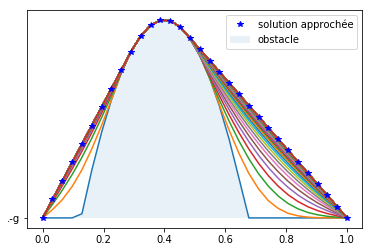

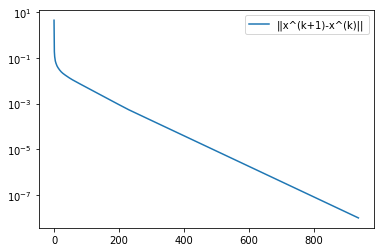

In [15]:
def K(n):
    return -(np.diag(np.ones(n-1),1)-2*np.eye(n)+np.diag(np.ones(n-1),-1))*n

n=30
h=1/(n+1)
x=np.linspace(0,1,n+2)[1:-1]
Psi=np.maximum(1.5-20*(x-0.4)**2,.0)#np.exp(-200*(x-0.25)**2)+np.exp(-200*(x-0.75)**2)#
A=K(n)
v = np.zeros(n)
err = 1.
tau=0.015
G=[]
plt.figure(1)
it=0
while(True):
    tmp = v - tau*np.dot(A,v)
    tmp = projDh(tmp,Psi)
    err = np.linalg.norm(tmp-v)
    G.append(err)
    v=tmp
    if it%10==0:
        plt.plot(np.hstack((0,x,1)),np.hstack((0,v,0)))
    if err<= 1.e-8:
        break
    it+=1


plt.plot(np.hstack((0,x,1)),np.hstack((0,v,0)),'*b',label="solution approchée")
plt.fill_between(x,Psi,'.-g',label='obstacle',alpha=0.1)
plt.legend()
plt.figure
plt.figure(3)
plt.semilogy(G,label="||x^(k+1)-x^(k)||")
plt.legend()


**Q15)**  Afficher $2/\lambda_n$, où $\lambda_n$ est la plus grande valeure propre de $A$ et reprendre le test de la question precedente en utilisant. le taux optimal $\tau^\star=\frac{\lambda_1}{\lambda_n^2}$. Tracer sur la même figure la solution approchée et la fonction $\Psi$. Afficher aussi le vecteur $G$ et commenter.


lambda_n = 119.692
2/lambda_n = 0.0167095
tau optimal : 2.14879e-05


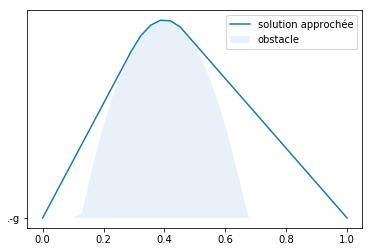

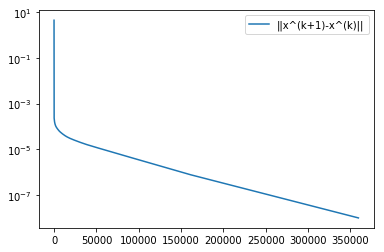

In [16]:
v = np.zeros(n)
err = 1.

vp = np.linalg.eigvalsh(A)
print('lambda_n = %g'%np.max(vp))
tau=np.min(vp)/np.max(vp)**2
print('2/lambda_n = %g'%(2/np.max(vp)))
print('tau optimal : %g' %  (np.min(vp)/np.max(vp)**2))
G=[]
while(True):
    tmp = v - tau*np.dot(A,v)
    tmp = projDh(tmp,Psi)
    err = np.linalg.norm(tmp-v)
    G.append(err)
    v=tmp
    if err<= 1.e-8:
        break

plt.figure(4)
plt.plot(np.hstack((0,x,1)),np.hstack((0,v,0)),label="solution approchée")
plt.fill_between(x,Psi,'.-g',label='obstacle',alpha=0.1)
plt.legend()
plt.figure
plt.figure(5)
plt.semilogy(G,label="||x^(k+1)-x^(k)||")
plt.legend()


**Q16)** Vérifier numeriquement que la solution approchée $U$ satisfait les conditions suivantes

$$ \begin{cases}
U_i = 0 & \hbox{ si } i \in J_h \hbox{ (bord) } \\
- A U_i < 0 & \hbox{ si } U_i = \Psi_i \\
- A U_i = 0 & \hbox{ si } U_i > \Psi_i 
\end{cases} $$

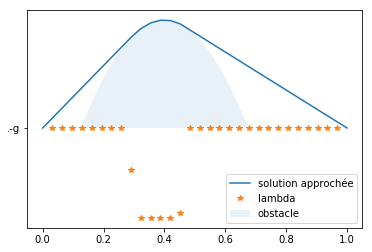

In [17]:
plt.figure(6)
plt.plot(np.hstack((0,x,1)),np.hstack((0,v,0)),label="solution approchée")
plt.fill_between(x,Psi,'.-g',label='obstacle',alpha=0.1)
ld=-np.dot(A,v)
plt.plot(x,ld,'*',label="lambda")
plt.legend()


### Le cas d=2



In [18]:



from mpl_toolkits.mplot3d import Axes3D


#triangulation du carré [-1,1]^2
def triangulation_carre(n):
    x,y = np.meshgrid(np.linspace(-1.,1.,n),
                      np.linspace(-1.,1.,n))
    x = x.reshape(n*n,1)
    y = y.reshape(n*n,1)
    X = np.hstack((x,y))
    T = tri.Triangulation(x.flatten(), y.flatten()).triangles
    return X,T

# afficher la triangulation dont les sommets sont [X[:,0],X[:,1],Z] et les triangles T
def afficher_triangulation_3d(X,T,Z):
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = fig.add_subplot(1, 2, 1, projection='3d',)
    ax.plot_trisurf(X[:,0],X[:,1],Z,triangles=T, cmap=plt.cm.Spectral, shade=True)
    plt.show()

#Matrices de masse et de rigidité sur chaque element de la triangulation
def M_elem(S1,S2,S3):
    x1 = S1[0]
    y1 = S1[1]
    x2 = S2[0] 
    y2 = S2[1]
    x3 = S3[0]
    y3 = S3[1]
    D = ((x2-x1)*(y3-y1) - (y2-y1)*(x3-x1))
    M=(1.*np.abs(D)/24)*np.ones([3,3])
    M[range(3),range(3)]=1.*np.abs(D)/12
    return M

def K_elem(S1,S2,S3):
    x1 = S1[0]
    y1 = S1[1]
    x2 = S2[0] 
    y2 = S2[1]
    x3 = S3[0]
    y3 = S3[1]
    norm = np.zeros([3, 2])
    norm[0, :] = np.array([y2-y3, x3-x2])
    norm[1, :] = np.array([y3-y1, x1-x3])
    norm[2, :] = np.array([y1-y2, x2-x1])
    D = ((x2-x1)*(y3-y1) - (y2-y1)*(x3-x1))
    K = np.zeros([3,3])
    for i in range(3):
        for j in range(3):
            K[i,j] = np.dot(norm[i,:],norm[j,:])
    return (1./(2*abs(D)))*K


# Assemblage matrices de masse et de rigidité
def masse_et_rigidite(X,T):
    NSom = X.shape[0]
    NTri = T.shape[0]
    K = np.zeros([NSom,NSom])
    M = np.zeros([NSom,NSom])
    for N in range(0,NTri):
        S1=X[T[N,0],:]
        S2=X[T[N,1],:]
        S3=X[T[N,2],:]
        Kel=K_elem(S1, S2, S3)
        Mel=M_elem(S1, S2, S3)
        for i in range(0,3): 
            I = T[N,i]
            for j in range(0,3): 
                J = T[N,j]
                M[I,J] = M[I,J] + Mel[i,j]
                K[I,J] = K[I,J] + Kel[i,j]
    return M,K


**Q1)** Implementer  l'algorithme du gradient projeté dans le cas du carré  $\Omega = (-1,1)^2$, en utilisant
$ \Psi(x,y) = \kappa(2x^2+2y^2) $
où $$\kappa(t) = \begin{cases}\exp(-1/(1-t^2))\;&\text{si}\;t<1\\
                              0\;&\text{sinon.}\end{cases}$$

On pourra utiliser `np.where` pour construire la liste $J$ des indices des poins du bord. On pourra visualiser le graphe d'une fonction en 3D en utilisant la fonction `afficher_triangulation`.
Afficher toutes les $100$ iterations les points où la contrainte est **active**, $u^{(k)}=\Psi$. Utiliser $\tau=0.2$. 

lambda_n = 0.25071


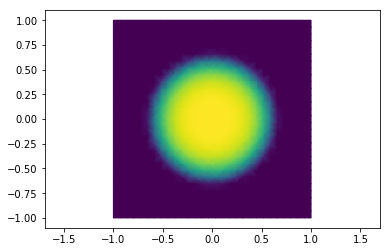

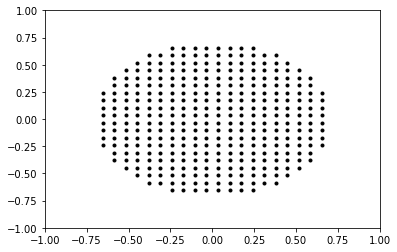

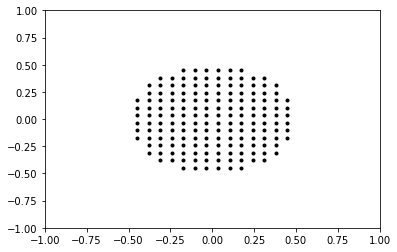

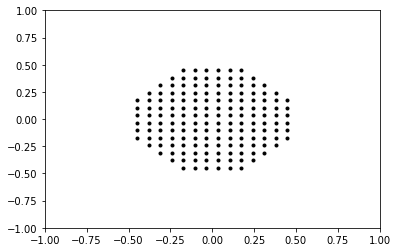

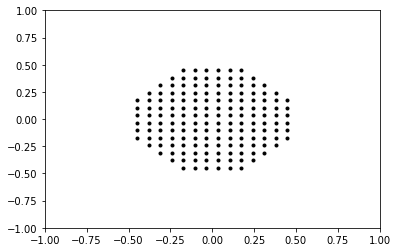

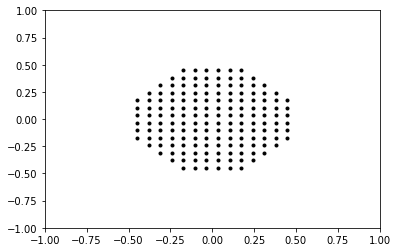

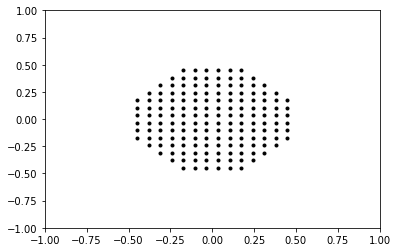

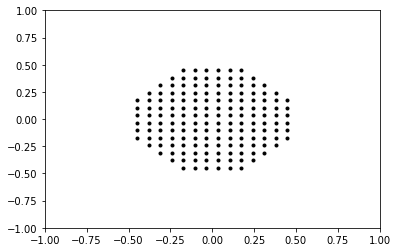

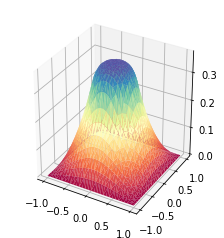

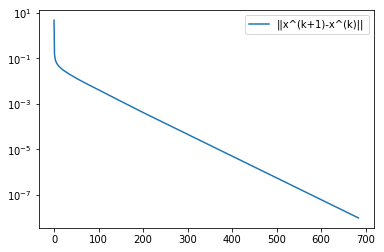

In [19]:
X,T = triangulation_carre(30)
M,Q = masse_et_rigidite(X,T)
#A = K.copy()
J = np.where(np.logical_or(np.abs(X[:,0]) >= 1 - 1e-10, np.abs(X[:,1]) >= 1-1e-10))
N = len(X)

# definition de Psi
def kappa(t):
    r = np.zeros_like(t)
    I = np.abs(t) < 1.
    r[I] = np.exp(-1/(1-t[I]**2))
    return r
    
plt.figure()
Psi = kappa(2*(X[:,0]**2 + X[:,1]**2))
plt.tripcolor(X[:,0],X[:,1],T,Psi,shading='gouraud')
plt.axis('equal')

# calcul des valeurs propres
vp = np.linalg.eigvalsh(Q)
print('lambda_n = %g' %(2/np.max(vp)))
tau = 0.2
v = np.zeros(N)
G=[]
it=0
plt.figure()
while(True):
    tmp = v - tau * np.dot(Q,v)
    tmp = projDh(tmp, Psi)
    tmp[J] = 0
    err=np.linalg.norm(tmp-v)
    G.append(err)
    v=tmp
    if err<=1.e-8:
        break
       
    if it%100==0:
#        afficher_triangulation_3d(X,T,v)
        Iactive = np.where(np.logical_and(v <= Psi, v > 0))
#        Iinactive = np.where(v > Psi)
        plt.plot(X[Iactive,0],X[Iactive,1],'.k')
        plt.axis([-1., 1., -1., 1.])
        plt.show()
    it +=1
    
afficher_triangulation_3d(X,T,v) 

plt.figure()
plt.semilogy(G,label="||x^(k+1)-x^(k)||")
plt.legend()


**Q2)** Vérifier numeriquement que la solution approchée $U$ satisfait les conditions de la question **Q16**.

In [20]:
Iactive = np.where(np.logical_and(v <= Psi, v > 0))
Iinactive = np.where(v > Psi)
print(np.linalg.norm(np.dot(Q, v)[Iinactive]))
print(np.maximum((-np.dot(Q, v)[Iactive]),0)) 


4.810533641417175e-08
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
